In [52]:
import pandas as pd
import numpy as np

##### Task 1.1

In [53]:
#using original dataset

hydrogen_df = pd.read_csv("Datasets/hydrogen.csv")

hydrogen_df

,label,text
0,Irrelevant,agree with dr boyle s answer to can using hydr...
1,Relevant,intesasanpaolo snam strongstrongbuy mou with s...
2,Relevant,truckstop in lytton queensland will become the...
3,Relevant,will this toyota do for hydrogen what the priu...
4,Relevant,hydrogen fuel ferry declared a success in the ...
...,...,...
2495,Relevant,tesla sued for $ billion by hydrogen truck sta...
2496,Irrelevant,wow quantum microscope sees the hydrogen atom ...
2497,Irrelevant,myclobutanil is a triazole chemical used as a ...
2498,Relevant,let s talk about green hydrogen and why it act...


In [54]:
def create_binary_set(sentence,vocabulary):
    result = []
    words = set(sentence.split(" "))
    for word in vocabulary:
        if word in words:
            result.append(1)
        else:
            result.append(0)
    return result


In [55]:
V = set()

for sentence in hydrogen_df["text"]:
    V.update(sentence.split(" "))
vocabulary = sorted(list(V))

print("Vocabulary:", vocabulary)

binary_matrix = []
for sentence in hydrogen_df["text"]:
    binary_matrix.append(create_binary_set(sentence, vocabulary))

binary_df = pd.DataFrame(binary_matrix, columns=vocabulary)

df = pd.concat([hydrogen_df, binary_df], axis=1)

print("\nFinal DataFrame:")
print(df)

Vocabulary: ['$', '$$', '$aabb', '$acb', '$aee', '$agn', '$alkff', '$ang', '$aphlf', '$apple', '$avl', '$avr', '$bene', '$bldp', '$bpt', '$btc', '$cat', '$cdt', '$chpo', '$cia', '$clf', '$cob', '$cvx', '$egl', '$emh', '$eth', '$f', '$fcel', '$fwonk', '$gdg', '$ggii', '$gm', '$grn', '$grntf', '$hcch', '$hmbl', '$hpur', '$hydro', '$hygs', '$hysr', '$ilus', '$imgn', '$krbn', '$lin', '$ltnc', '$mt', '$nkla', '$npwz', '$ocn', '$org', '$pkx', '$plug', '$prrsf', '$pwwr', '$spd', '$trx', '$tsla', '$ual', '$v', '$ven', '$x', '$xfls', 'a', 'a$', 'aaa', 'aaron', 'aayog', 'aayushjs', 'ab', 'abate', 'abbas', 'abc', 'abcaustralia', 'abcclimatewatch', 'abcnews', 'abe', 'abeeolicaeolica', 'abengoa', 'aberdeen', 'aberdeencc', 'aberdeen’s', 'abfalecbaldwin', 'abg', 'able', 'ableg', 'abolish', 'about', 'above', 'absence', 'absent', 'absolutely', 'absurd', 'abt', 'abundance', 'abundant', 'abuse', 'academia', 'accelerate', 'accelerating', 'acceleration', 'accelerator', 'accept', 'accepted', 'access', 'acce

In [56]:
print(df)

           label                                               text  $  $$  \
0     Irrelevant  agree with dr boyle s answer to can using hydr...  0   0   
1       Relevant  intesasanpaolo snam strongstrongbuy mou with s...  0   0   
2       Relevant  truckstop in lytton queensland will become the...  0   0   
3       Relevant  will this toyota do for hydrogen what the priu...  0   0   
4       Relevant  hydrogen fuel ferry declared a success in the ...  0   0   
...          ...                                                ... ..  ..   
2495    Relevant  tesla sued for $ billion by hydrogen truck sta...  1   0   
2496  Irrelevant  wow quantum microscope sees the hydrogen atom ...  0   0   
2497  Irrelevant  myclobutanil is a triazole chemical used as a ...  0   0   
2498    Relevant  let s talk about green hydrogen and why it act...  0   0   
2499    Relevant  hydrogen fuel cells have been touted as the ne...  0   0   

      $aabb  $acb  $aee  $agn  $alkff  $ang  ...  🤖  🤝  🤣🤣🤣🤣🤣🤣🤣

In [57]:
#pre-processing

from sklearn.preprocessing import LabelEncoder

# create encoder
le = LabelEncoder()

# learn the mapping
le.fit(df["label"])

# transform the original column into numbers
df["label"] = le.transform(df["label"])


df

,label,text,$,$$,$aabb,$acb,$aee,$agn,$alkff,$ang,...,🤖,🤝,🤣🤣🤣🤣🤣🤣🤣,🤦🏻‍♂️,🤨,🤭😜😂,🥴,🥺,🧐🤓🤔,🫧
0,0,agree with dr boyle s answer to can using hydr...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,intesasanpaolo snam strongstrongbuy mou with s...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,truckstop in lytton queensland will become the...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,will this toyota do for hydrogen what the priu...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,hydrogen fuel ferry declared a success in the ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,tesla sued for $ billion by hydrogen truck sta...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,wow quantum microscope sees the hydrogen atom ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,myclobutanil is a triazole chemical used as a ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,1,let s talk about green hydrogen and why it act...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#curse of dimensionality with original dataset

df = df.drop(columns="text")
#select 3 rows from the dataset, define different dimensionalities to test, slice the vectors by dimension, and 
#compute Euclidean distances to see how distances change when dimensionality increases.

b1_full = df.iloc[0].values
b2_full = df.iloc[1].values
b3_full = df.iloc[2].values

import numpy as np

#define different dimensionalities to test
dims = [5, 10, 50, 100, 200, 500, 1000, df.shape[1]]  # feature sizes to test

#slice the vectors by dimension
for d in dims:
    b1 = b1_full[:d]
    b2 = b2_full[:d]
    b3 = b3_full[:d]

##compute Euclidean distances
    euclidean_dist_d1d2 = np.linalg.norm(np.array(b1) - np.array(b2))
    euclidean_dist_d1d3 = np.linalg.norm(np.array(b1) - np.array(b3))

    print(f"Dimensions={d:4d} | d1-d2={euclidean_dist_d1d2:.3f} | d1-d3={euclidean_dist_d1d3:.3f}")

Dimensions=   5 | d1-d2=1.000 | d1-d3=1.000
Dimensions=  10 | d1-d2=1.000 | d1-d3=1.000
Dimensions=  50 | d1-d2=1.000 | d1-d3=1.000
Dimensions= 100 | d1-d2=1.000 | d1-d3=1.414
Dimensions= 200 | d1-d2=1.414 | d1-d3=1.414
Dimensions= 500 | d1-d2=2.236 | d1-d3=2.236
Dimensions=1000 | d1-d2=2.236 | d1-d3=3.000
Dimensions=9567 | d1-d2=5.831 | d1-d3=6.164


In [8]:
# for reference
'''#drop columns with only one unique value, because it means this word is present or absent in all the texts.
df.loc[:, (df.nunique() > 1)]

df = df.loc[:, (df.nunique() > 1)]

#find all words that appear in every text

words_set = [set(s.split()) for s in hydrogen_df["text"]]

common_words = set.intersection(*words_set)

print("Words present in ALL texts:", common_words)'''


'#drop columns with only one unique value, because it means this word is present or absent in all the texts.\ndf.loc[:, (df.nunique() > 1)]\n\ndf = df.loc[:, (df.nunique() > 1)]\n\n#find all words that appear in every text\n\nwords_set = [set(s.split()) for s in hydrogen_df["text"]]\n\ncommon_words = set.intersection(*words_set)\n\nprint("Words present in ALL texts:", common_words)'

In [9]:
#using tfidf_features.csv

hydrogen_tfidf = pd.read_csv("Datasets/tfidf_features.csv")

In [10]:
hydrogen_tfidf

,aaa,aabb,aaron,aayog,aayushjs,ab,abate,abbas,abc,abcaustralia,...,zeroemissions,zhongtong,zi,zif,zimiz,zinc,zoneflow,zqke,zuurstof,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Task 1.2 tfidf dataset

In [11]:
#select 3 rows from the dataset, define different dimensionalities to test, slice the vectors by dimension, and 
#compute Euclidean distances to see how distances change when dimensionality increases.

b1_full = hydrogen_tfidf.iloc[0].values
b2_full = hydrogen_tfidf.iloc[1].values
b3_full = hydrogen_tfidf.iloc[2].values

import numpy as np

#define different dimensionalities to test
dims = [5, 10, 50, 100, 200, 500, 1000, hydrogen_tfidf.shape[1]]  # feature sizes to test

#slice the vectors by dimension
for d in dims:
    b1 = b1_full[:d]
    b2 = b2_full[:d]
    b3 = b3_full[:d]

##compute Euclidean distances
    euclidean_dist_d1d2 = np.linalg.norm(np.array(b1) - np.array(b2))
    euclidean_dist_d1d3 = np.linalg.norm(np.array(b1) - np.array(b3))

    print(f"Dimensions={d:4d} | d1-d2={euclidean_dist_d1d2:.3f} | d1-d3={euclidean_dist_d1d3:.3f}")



Dimensions=   5 | d1-d2=0.000 | d1-d3=0.000
Dimensions=  10 | d1-d2=0.000 | d1-d3=0.000
Dimensions=  50 | d1-d2=0.000 | d1-d3=0.000
Dimensions= 100 | d1-d2=0.229 | d1-d3=0.000
Dimensions= 200 | d1-d2=0.450 | d1-d3=0.387
Dimensions= 500 | d1-d2=0.553 | d1-d3=0.503
Dimensions=1000 | d1-d2=0.687 | d1-d3=0.829
Dimensions=8968 | d1-d2=1.414 | d1-d3=1.411


##### Task 1.3 tfidf dataset

In [12]:
# Extract target attribute (classes).
y = hydrogen_df["label"].values
# Store dataframe in X.
X = hydrogen_tfidf

In [13]:
from sklearn.preprocessing import StandardScaler

random_seed = 10

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Replace the old DataFrame for X, but retain the column names.

X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

X

,aaa,aabb,aaron,aayog,aayushjs,ab,abate,abbas,abc,abcaustralia,...,zeroemissions,zhongtong,zi,zif,zimiz,zinc,zoneflow,zqke,zuurstof,zz
0,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.027222,-0.028007,-0.020004,-0.027657,-0.020004,...,-0.054407,-0.020004,-0.020004,-0.020004,-0.020004,-0.028235,-0.020004,-0.020004,-0.020004,-0.020004
1,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.027222,-0.028007,-0.020004,-0.027657,-0.020004,...,-0.054407,-0.020004,-0.020004,-0.020004,-0.020004,-0.028235,-0.020004,-0.020004,-0.020004,-0.020004
2,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.027222,-0.028007,-0.020004,-0.027657,-0.020004,...,-0.054407,-0.020004,-0.020004,-0.020004,-0.020004,-0.028235,-0.020004,-0.020004,-0.020004,-0.020004
3,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.027222,-0.028007,-0.020004,-0.027657,-0.020004,...,-0.054407,-0.020004,-0.020004,-0.020004,-0.020004,-0.028235,-0.020004,-0.020004,-0.020004,-0.020004
4,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.027222,-0.028007,-0.020004,-0.027657,-0.020004,...,-0.054407,-0.020004,-0.020004,-0.020004,-0.020004,-0.028235,-0.020004,-0.020004,-0.020004,-0.020004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.027222,-0.028007,-0.020004,-0.027657,-0.020004,...,-0.054407,-0.020004,-0.020004,-0.020004,-0.020004,-0.028235,-0.020004,-0.020004,-0.020004,-0.020004
2496,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.027222,-0.028007,-0.020004,-0.027657,-0.020004,...,-0.054407,-0.020004,-0.020004,-0.020004,-0.020004,-0.028235,-0.020004,-0.020004,-0.020004,-0.020004
2497,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.027222,-0.028007,-0.020004,-0.027657,-0.020004,...,-0.054407,-0.020004,-0.020004,-0.020004,-0.020004,-0.028235,-0.020004,-0.020004,-0.020004,-0.020004
2498,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.027222,-0.028007,-0.020004,-0.027657,-0.020004,...,-0.054407,-0.020004,-0.020004,-0.020004,-0.020004,-0.028235,-0.020004,-0.020004,-0.020004,-0.020004


In [23]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()

threshold = 0.90 

n_components = np.argmax(cumulative_variance >= threshold) + 1 

print(f"Number of components needed to retain {threshold*100:.0f}% variance:", n_components)

Number of components needed to retain 90% variance: 1676


In [32]:
pca = PCA()
X_pca = pca.fit_transform(X.values)

#fitting a PCA model to 2 components. This tunable is specified in the PCA constructor

'''from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.values)'''

'from sklearn.decomposition import PCA\npca = PCA(n_components=2)\nX_pca = pca.fit_transform(X.values)'

In [33]:
# Explained variance ratio per component
explained_ratios = pca.explained_variance_ratio_

# Compute cumulative variance manually
cumulative_variance = []
total = 0
for r in explained_ratios:
    total += r
    cumulative_variance.append(total)

print(cumulative_variance[:10])

[0.002230595891933511, 0.004446123831256289, 0.006464838531815247, 0.00846733718856568, 0.010430273663138565, 0.01221686476352239, 0.013914693027119663, 0.015581193353392813, 0.017232781877660298, 0.01888003035990278]


In [ ]:
#constructing a new dataframe, and examining the values

'''X_pca = pd.DataFrame(X_pca,columns=["PC1","PC2"])
X_pca'''

ValueError: Shape of passed values is (2500, 2500), indices imply (2500, 2)

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

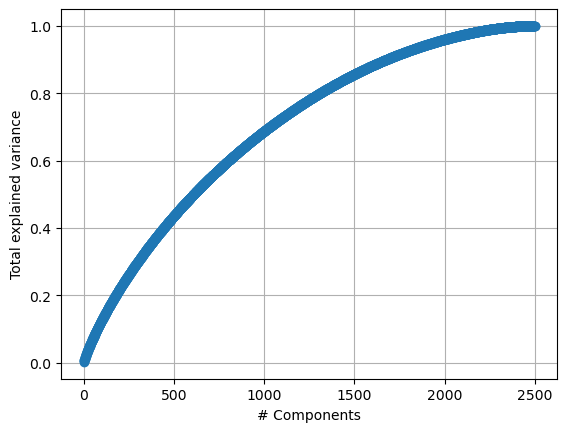

In [39]:
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="o")
plt.xlabel("# Components")
plt.ylabel("Total explained variance")
plt.grid()
plt.show()

In [35]:
print(pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

[2.23059589e-03 2.21552794e-03 2.01871470e-03 ... 2.64255946e-34
 2.62633904e-34 1.32858923e-34]
Total explained variance: 0.9999999999999998


In [ ]:
#define the cutoff for explained variance
threshold = 0.9

cumulative_variance_df = pd.DataFrame(cumulative_variance, index=range(1, len(cumulative_variance)+1),columns=["total_explained_variance"])

n_components_threshold = cumulative_variance_df[
cumulative_variance_df["total_explained_variance"] >= threshold
].index[0]

n_components_maximum = len(cumulative_variance_df)

print(f"Components needed to explain {threshold*100:.0f}% variance:", n_components_threshold)
print("Components needed for explaining maximum variance:", n_components_maximum)

Components needed to explain 90% variance: 1676
Components needed for explaining maximum variance: 2500


In [50]:
#find the variance explained by top 5 components

top5_components_variance = explained_ratios[:5].sum()

print("Explained variance of top 5 components:", top5_components_variance)

Explained variance of top 5 components: 0.010430273663138565


In [ ]:
'''from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

comps_num = np.arange(1,X.shape[1])
comps_variance = []

for num_components in comps_num:
    # Fit a PCA model to the specified number of components.
    pca = PCA(n_components=num_components)
    pca.fit(X.values)
    # Compute total explained variance and append to results array.
    total_explained_variance = sum(pca.explained_variance_ratio_)
    comps_variance.append(total_explained_variance)'''

KeyboardInterrupt: 

In [ ]:
'''# Add grid lines to improve visibility.
plt.figure(1,figsize=(12,6))
plt.grid()

# Plot each of the data points, using a circular marker.
plt.plot(comps_num,comps_variance,marker='o')

# Set the X axis to our component range, and the Y axis limits from 0 to 1 (as variance
#is a ratio between 0 and 1).

plt.xlabel("# Components")
plt.ylabel("Total explained variance")
plt.show()'''
 

In [ ]:
'''pd.DataFrame(comps_variance,index=comps_num, columns=["total_explained_variance"])

#Above 2 components, we are clearly hitting diminishing returns. 1->2 is an increase of 0.24, 2->3 is
#an increase of 0.03, 3->4 is an increase of 0.0005.'''

ValueError: Shape of passed values is (23, 1), indices imply (8967, 1)

In [23]:
hydrogen_tfidf_small = pd.read_csv("Datasets/tfidf_features_small.csv")

In [24]:
hydrogen_tfidf_small

,aaa,aabb,ab,abbas,abc,abeeolicaeolica,aberdeen,able,about,above,...,zi,zif,zinc,zoneflow,الحمد,دوسری,طرف,لله,中英雙語句子,論文１
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.244502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
